# 対話状態として1つになった音声を作成します

In [ ]:
from pathlib import Path

# 台本を指定
# dialogue_info_txt = "../dataset/out_LINE_woITAKO/dialogue_info.txt"
dialogue_info_txt = "../dataset/out_LINE_woITAKO_before_emotion/dialogue_info.txt"
# 音声を指定
Teacher_voice_base = Path("recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_4_sr22050_LINE_wContextwProsody_39_FS_GMM_CE_PCE_P2_g_p_EMO2/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval")
Mstudent_voice_base = Path("../dataset/out_LINE_MStudent/LINE_MStudent/wav")
Fstudent_voice_base = Path("../dataset/out_LINE_FStudent/LINE_FStudent/wav")

# 出力したいダイアログ名を指定
output_dialogue_names = ["LD12-Dialogue-07", "LD11-Dialogue-05", "LD14-Dialogue-08", "LD13-Dialogue-03"]

# 出力先
output_base = Path("dialogue_output_LINE_wContextwProsody_39_FS_GMM_CE_PCE_P2_g_p_EMO2")

output_base.mkdir(parents=True, exist_ok=True)

# 間に挟む無音時間(s)
silence = 0.2

# sampling rate
sampling_rate = 22050

## 実行

In [ ]:
import numpy as np
import librosa
from scipy.io import wavfile

with open(dialogue_info_txt, 'r') as f:
    dialogue_info = f.readlines()

def get_dialogue(dialogue_info, dialogue_name):
    output = []
    for dialogue_txt in dialogue_info:
        if dialogue_name in dialogue_txt:
            output.append(dialogue_txt.strip())
    return output
    
for output_dialogue_name in output_dialogue_names:
    dialogues = get_dialogue(dialogue_info, output_dialogue_name)
    output_wav = []
    for txt in dialogues:
        name = txt.split(":")[0]
        spk = name.split("_")[0]
        if spk == "PAD":
            continue
        elif spk == "Teacher":
            wav_path = Teacher_voice_base / (name + ".wav")
        elif spk == "MStudent":
            wav_path = Mstudent_voice_base / (name + ".wav")
        elif spk == "FStudent":
            wav_path = Fstudent_voice_base / (name + ".wav")  
        _sr, x = wavfile.read(wav_path)
        if x.dtype in [np.int16, np.int32]:
            x = (x / np.iinfo(x.dtype).max).astype(np.float64)
        wav = librosa.resample(x, _sr, sampling_rate)
        output_wav += list(wav)
        output_wav += [0.0] * int(sampling_rate * silence)

    output_path = output_base / (output_dialogue_name + '.wav')
    output_wav = (np.array(output_wav) * np.iinfo(np.int16).max).astype(np.int16)
    wavfile.write(output_path, sampling_rate, output_wav)

### (メモ)おすすめdialogueリスト

すべて, eval内から選出

LD12-Dialogue-07: Angry
```
PAD_LD12-Dialogue-07-PAD-Turn-00_PAD:118:0:生徒が部活動の顧問に怒られて不機嫌そうにしているので、講師が生徒に話を聞いてみる
Teacher_LD12-Dialogue-07-Teacher-Turn-01_Normal:118:1:こんにちは！
MStudent_LD12-Dialogue-07-MStudent-Turn-01_Angry:118:2:先生、聞いてくださいよ！俺、納得いかないことがあるんです！
Teacher_LD12-Dialogue-07-Teacher-Turn-02_Normal:118:3:どうしたの？そんな不機嫌そうな顔で。
MStudent_LD12-Dialogue-07-MStudent-Turn-02_Angry:118:4:今日、朝練に遅刻しちゃったんですよ。そうしたら顧問の先生が怒って、「遅刻するやつはもう練習に来なくていい！」って、言われて！
Teacher_LD12-Dialogue-07-Teacher-Turn-03_Normal:118:5:そうだったの。どうして遅刻したの？
MStudent_LD12-Dialogue-07-MStudent-Turn-03_Normal:118:6:登校中に泣いている小学生がいたから、声をかけたんです。走っていたら転んじゃったらしくて。それで、小学校までおぶって行ってあげたんですよ。それで遅れたんです！
Teacher_LD12-Dialogue-07-Teacher-Turn-04_Normal:118:7:いいことしたねー！そのことは顧問の先生に説明したの？
MStudent_LD12-Dialogue-07-MStudent-Turn-04_Angry:118:8:結局、朝練は参加させてもらえなかったんですけど、昼休みに話をしに行きました。それで、放課後の練習は参加させてもらったんですけど。でも、俺が一番怒ってるのは、朝練に参加できなかったことじゃないんですよ！
Teacher_LD12-Dialogue-07-Teacher-Turn-05_Normal:118:9:じゃあ、何に腹が立ったの？
MStudent_LD12-Dialogue-07-MStudent-Turn-05_Angry:118:10:その顧問の先生が、俺の話を聞かずに、頭ごなしに怒鳴ったことですよ！俺は寝坊したわけでもないのに！
Teacher_LD12-Dialogue-07-Teacher-Turn-06_Angry:118:11:たしかに、それは腹が立っても仕方ないと思うよ！せめて話は聞いてほしかったよねー？
MStudent_LD12-Dialogue-07-MStudent-Turn-06_Sad:118:12:そうです。朝からいいことしたなって思ってたんですけど、そのことがあって気分が下がりましたよ。
Teacher_LD12-Dialogue-07-Teacher-Turn-07_Happy:118:13:そうだよねー。でも、あなたはその小学生の子にとってヒーローみたいだったと思うよ！
MStudent_LD12-Dialogue-07-MStudent-Turn-07_Happy:118:14:そう、ですよね！そう思ってもらえていたら、俺もうれしいです！
Teacher_LD12-Dialogue-07-Teacher-Turn-08_Happy:118:15:きっとそうだと思うな！元気出しなよ！
MStudent_LD12-Dialogue-07-MStudent-Turn-08_Happy:118:16:そうします。ありがとうございます、先生！
```

LD11-Dialogue-05: Sad
```
PAD_LD11-Dialogue-05-PAD-Turn-00_PAD:13:0:生徒が部活動に関するイベントがうまくいかなかったようで、悲しそうにしているので、講師が生徒に話を聞いてみる
Teacher_LD11-Dialogue-05-Teacher-Turn-01_Normal:13:1:どうしたー？何か元気ないけど。
MStudent_LD11-Dialogue-05-MStudent-Turn-01_Sad:13:2:先生…。ちょっと、悲しいお知らせが。
Teacher_LD11-Dialogue-05-Teacher-Turn-02_Sad:13:3:なになに、どうした？
MStudent_LD11-Dialogue-05-MStudent-Turn-02_Sad:13:4:先週、部活の大会があって。
Teacher_LD11-Dialogue-05-Teacher-Turn-03_Normal:13:5:うんうん。こないだ言ってたね。
MStudent_LD11-Dialogue-05-MStudent-Turn-03_Sad:13:6:自己ベストをねらってたんですけど…。
Teacher_LD11-Dialogue-05-Teacher-Turn-04_Sad:13:7:ダメだった？
MStudent_LD11-Dialogue-05-MStudent-Turn-04_Sad:13:8:はい。自己ベスト以前に、予選敗退でした。
Teacher_LD11-Dialogue-05-Teacher-Turn-05_Sad:13:9:それは残念だったねー…。
MStudent_LD11-Dialogue-05-MStudent-Turn-05_Sad:13:10:もうショックすぎて。
Teacher_LD11-Dialogue-05-Teacher-Turn-06_Normal:13:11:大丈夫？あまり引きずらないことが大事よ。
MStudent_LD11-Dialogue-05-MStudent-Turn-06_Normal:13:12:ですよね。切り替えなくちゃ。
Teacher_LD11-Dialogue-05-Teacher-Turn-07_Normal:13:13:また大会あるんでしょう？
MStudent_LD11-Dialogue-05-MStudent-Turn-07_Normal:13:14:はい、9月に。
Teacher_LD11-Dialogue-05-Teacher-Turn-08_Normal:13:15:まだまだチャンスあるよ！頑張ろう！
```

LD14-Dialogue-08: Happy
```
PAD_LD14-Dialogue-08-PAD-Turn-00_PAD:58:0:天気が良くて生徒が嬉しそうにしている
FStudent_LD14-Dialogue-08-FStudent-Turn-01_Happy:58:1:今日は、塾が終わったら、家族で出かけるんです。
Teacher_LD14-Dialogue-08-Teacher-Turn-01_Happy:58:2:そうなんだ！天気もいいし、よかったね！
FStudent_LD14-Dialogue-08-FStudent-Turn-02_Happy:58:3:はい。先週、雨で流れたんで、なおさら嬉しいです。
Teacher_LD14-Dialogue-08-Teacher-Turn-02_Normal:58:4:どこへいくの？
FStudent_LD14-Dialogue-08-FStudent-Turn-03_Happy:58:5:ドッグランに行くんです。
Teacher_LD14-Dialogue-08-Teacher-Turn-03_Happy:58:6:そっか！わんちゃんたちも喜ぶね！
FStudent_LD14-Dialogue-08-FStudent-Turn-04_Happy:58:7:はい。室内飼いのせいか、外に出ると、すごくはしゃぎ回るんですよ。
Teacher_LD14-Dialogue-08-Teacher-Turn-04_Happy:58:8:あなたもはしゃぎ回りそうだよね！
FStudent_LD14-Dialogue-08-FStudent-Turn-05_Happy:58:9:まあ、確かに、ちょっとテンション上がりますけど。
Teacher_LD14-Dialogue-08-Teacher-Turn-05_Happy:58:10:ちょっとー？
FStudent_LD14-Dialogue-08-FStudent-Turn-06_Happy:58:11:いや、だいぶかな。
Teacher_LD14-Dialogue-08-Teacher-Turn-06_Happy:58:12:だよね！すごく嬉しそうだもん！
FStudent_LD14-Dialogue-08-FStudent-Turn-07_Happy:58:13:いやー、もう、楽しみで。天気もいいから、いろんな犬がたくさんきていると思うんです。
Teacher_LD14-Dialogue-08-Teacher-Turn-07_Normal:58:14:じゃあ、残りは宿題ってならないように、集中して問題を解こうね！
FStudent_LD14-Dialogue-08-FStudent-Turn-08_Happy:58:15:はーい！頑張ります。
```

LD13-Dialogue-03: Normal
```
PAD_LD13-Dialogue-03-PAD-Turn-00_PAD:25:0:生徒が家族と喧嘩したようで、不機嫌そうにしているので、講師が生徒に話を聞いてみる
MStudent_LD13-Dialogue-03-MStudent-Turn-01_Angry:25:1:うわ、きっつー。
Teacher_LD13-Dialogue-03-Teacher-Turn-01_Normal:25:2:どうしたの？
MStudent_LD13-Dialogue-03-MStudent-Turn-02_Normal:25:3:姉さんが夕食を持たせてくれたんですけど。
Teacher_LD13-Dialogue-03-Teacher-Turn-02_Normal:25:4:うん。
MStudent_LD13-Dialogue-03-MStudent-Turn-03_Angry:25:5:ひどくないですか？梅干しのおにぎりが３つ！
Teacher_LD13-Dialogue-03-Teacher-Turn-03_Normal:25:6:あら、美味しそうじゃない！バリエーションは乏しいけど。
MStudent_LD13-Dialogue-03-MStudent-Turn-04_Angry:25:7:僕、梅干し食べれないんですよ。
Teacher_LD13-Dialogue-03-Teacher-Turn-04_Normal:25:8:ほぉー、これは穏やかじゃないねぇ。何か怒らせるようなことした？
MStudent_LD13-Dialogue-03-MStudent-Turn-05_Angry:25:9:いや、むこうが先に僕を怒らせたんですよ。勝手に僕の部屋に入って、机の中を荒らしやがって。
Teacher_LD13-Dialogue-03-Teacher-Turn-05_Normal:25:10:それで？
MStudent_LD13-Dialogue-03-MStudent-Turn-06_Angry:25:11:だから穏やかに抗議したんですけど、母さんも妹も向こうの味方するんですよねぇ。「姉さんの定規を返さなかった僕の方が悪い」って。
Teacher_LD13-Dialogue-03-Teacher-Turn-06_Normal:25:12:たしかに。
MStudent_LD13-Dialogue-03-MStudent-Turn-07_Angry:25:13:え、先生も向こうの味方ですか？
Teacher_LD13-Dialogue-03-Teacher-Turn-07_Normal:25:14:だって元はと言えば…。
MStudent_LD13-Dialogue-03-MStudent-Turn-08_Angry:25:15:それは分かってます。返すのを忘れていた僕も悪い。でも、ひとの机を勝手に荒らした時点で、向こうの方が悪いと思うんです。
Teacher_LD13-Dialogue-03-Teacher-Turn-08_Normal:25:16:なるほど、「やり方が良くない」と。それで君は？改めて抗議したの？
MStudent_LD13-Dialogue-03-MStudent-Turn-09_Angry:25:17:仕返しに姉さんの部屋に入って、壁に「バカ」って書いてやりました。
Teacher_LD13-Dialogue-03-Teacher-Turn-09_Normal:25:18:それはさすがにやりすぎだよ。今日帰ったら、お姉さんとちゃんと仲直りすること。いいですね？
MStudent_LD13-Dialogue-03-MStudent-Turn-10_Normal:25:19:う…。そうですね、僕も少し頭に血が上ってたと思います。姉さんと話し合ってみます。
Teacher_LD13-Dialogue-03-Teacher-Turn-10_Normal:25:20:それでよし！仲直りできるといいね。
```

# pitch定量評価

In [1]:
# 評価したい音声フォルダリスト
voice_base_pathes = [
    # "recipes/fastspeech2/exp/LINE_3_sr22050_LINE_32_FS/synthesis_fastspeech2_hifigan/eval/reconstruct",
    "recipes/fastspeech2/exp/LINE_4_sr22050_LINE_34_FS_EMO2/synthesis_fastspeech2wEmotion_hifigan/eval/reconstruct", 
    "recipes/fastspeech2/exp/LINE_3_sr22050_LINE_32_FS/synthesis_fastspeech2_hifigan/eval",
    # "recipes/fastspeech2/exp/LINE_3_sr22050_LINE_33_FS_EMO1/synthesis_fastspeech2wEmotion_hifigan/eval",
    # "recipes/fastspeech2/exp/LINE_4_sr22050_LINE_34_FS_EMO2/synthesis_fastspeech2wEmotion_hifigan/eval", 
    "recipes/fastspeech2/exp/LINE_3_sr22050_LINE_35_FS_GMM/synthesis_fastspeech2wGMM_hifigan/eval", 
    # "recipes/fastspeech2/exp/LINE_3_sr22050_LINE_36_FS_GMM_EMO1/synthesis_fastspeech2wGMM_hifigan/eval", 
    # "recipes/fastspeech2/exp/LINE_4_sr22050_LINE_37_FS_GMM_EMO2/synthesis_fastspeech2wGMM_hifigan/eval", 
    # "recipes/fastspeech2/exp/LINE_3_sr22050_LINE_38_FS_GMM_g_p/synthesis_fastspeech2wGMM_hifigan/eval", 
    # "recipes/fastspeech2/exp/LINE_3_sr22050_LINE_39_FS_GMM_g_p_EMO1/synthesis_fastspeech2wGMM_hifigan/eval", 
    # "recipes/fastspeech2/exp/LINE_4_sr22050_LINE_40_FS_GMM_g_p_EMO2/synthesis_fastspeech2wGMM_hifigan/eval", 
    "recipes/fastspeech2wContexts/exp/LINE_wContext_sr22050_LINE_wContext_13_FS_GMM_CE/synthesis_fastspeech2wGMMwContexts_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContext_sr22050_LINE_wContext_14_FS_GMM_CE_EMO1/synthesis_fastspeech2wGMMwContexts_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContext_2_sr22050_LINE_wContext_15_FS_GMM_CE_EMO2/synthesis_fastspeech2wGMMwContexts_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContext_sr22050_LINE_wContext_16_FS_GMM_CE_g_p/synthesis_fastspeech2wGMMwContexts_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContext_sr22050_LINE_wContext_17_FS_GMM_CE_g_p_EMO1/synthesis_fastspeech2wGMMwContexts_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContext_2_sr22050_LINE_wContext_18_FS_GMM_CE_g_p_EMO2/synthesis_fastspeech2wGMMwContexts_hifigan/eval", 
    "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_22_FS_GMM_CE_PCE/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_23_FS_GMM_CE_PCE_EMO1/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_4_sr22050_LINE_wContextwProsody_24_FS_GMM_CE_PCE_EMO2/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_25_FS_GMM_CE_PCE_g_p/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_26_FS_GMM_CE_PCE_g_p_EMO1/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_4_sr22050_LINE_wContextwProsody_27_FS_GMM_CE_PCE_g_p_EMO2/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_28_FS_GMM_CE_PCE_P1/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_29_FS_GMM_CE_PCE_P1_EMO1/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_4_sr22050_LINE_wContextwProsody_30_FS_GMM_CE_PCE_P1_EMO2/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_31_FS_GMM_CE_PCE_P1_g_p/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_32_FS_GMM_CE_PCE_P1_g_p_EMO1/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_4_sr22050_LINE_wContextwProsody_33_FS_GMM_CE_PCE_P1_g_p_EMO2/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_34_FS_GMM_CE_PCE_P2/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_35_FS_GMM_CE_PCE_P2_EMO1/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_4_sr22050_LINE_wContextwProsody_36_FS_GMM_CE_PCE_P2_EMO2/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_37_FS_GMM_CE_PCE_P2_g_p/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_3_sr22050_LINE_wContextwProsody_38_FS_GMM_CE_PCE_P2_g_p_EMO1/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_4_sr22050_LINE_wContextwProsody_39_FS_GMM_CE_PCE_P2_g_p_EMO2/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval", 
    # "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_4_sr22050_LINE_wContextwProsody_39_FS_GMM_CE_PCE_P2_g_p_EMO2/synthesis_fastspeech2wGMMwContextswProsody_hifigan_temp_10/eval"
]
# before emotionの発話も混ざっているので, 基準とする感情ラベルを選ぶ↓
# emotion_base_path = "recipes/fastspeech2/exp/LINE_3_sr22050_LINE_32_FS/synthesis_fastspeech2_hifigan/eval/reconstruct"
emotion_base_path = "recipes/fastspeech2/exp/LINE_4_sr22050_LINE_34_FS_EMO2/synthesis_fastspeech2wEmotion_hifigan/eval/reconstruct"
labels = [
    "GT",
    "FS",
    # "FS+EMO1",
    # "FS+EMO2", 
    "FS+GMM", 
    # "FS+GMM+EMO1", 
    # "FS+GMM+EMO2", 
    # "FS+GMM+g_p", 
    # "FS+GMM+g_p+EMO1", 
    # "FS+GMM+g_p+EMO2", 
    "FS+GMM+CE", 
    # "FS+GMM+CE+EMO1", 
    # "FS+GMM+CE+EMO2", 
    # "FS+GMM+CE+g_p", 
    # "FS+GMM+CE+g_p+EMO1", 
    # "FS+GMM+CE+g_p+EMO2", 
    "FS+GMM+CE+PCE", 
    # "FS+GMM+CE+PCE+EMO1", 
    # "FS+GMM+CE+PCE+EMO2", 
    # "FS+GMM+CE+PCE+g_p", 
    # "FS+GMM+CE+PCE+g_p+EMO1", 
    # "FS+GMM+CE+PCE+g_p+EMO2", 
    "FS+GMM+CE+PCE+P1", 
    # "FS+GMM+CE+PCE+P1+EMO1", 
    # "FS+GMM+CE+PCE+P1+EMO2", 
    # "FS+GMM+CE+PCE+P1+g_p", 
    # "FS+GMM+CE+PCE+P1+g_p+EMO1", 
    # "FS+GMM+CE+PCE+P1+g_p+EMO2", 
    "FS+GMM+CE+PCE+P2", 
    # "FS+GMM+CE+PCE+P2+EMO1", 
    # "FS+GMM+CE+PCE+P2+EMO2", 
    # "FS+GMM+CE+PCE+P2+g_p", 
    # "FS+GMM+CE+PCE+P2+g_p+EMO1", 
    # "FS+GMM+CE+PCE+P2+g_p+EMO2", 
    # "FS+GMM+CE+PCE+P2+g_p+EMO2+tmp10", 
]


#### ライブラリ&関数用意

In [2]:
# ライブラリ
from pathlib import Path
import pyworld as pw
import numpy as np
from scipy.io import wavfile
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import stats
from concurrent.futures import ProcessPoolExecutor
from vc_tts_template.dsp import logmelspectrogram

# 定数
hop_length = 256
emotion_names = ["Normal", "Happy", "Sad", "Angry"]

# pitch計算用
def get_pitch_emo(wav_path):
    sr, x = wavfile.read(wav_path)
    if x.dtype in [np.int16, np.int32]:
        x = (x / np.iinfo(x.dtype).max).astype(np.float64)
    pitch, t = pw.dio(
        x.astype(np.float64),
        sr,
        frame_period=hop_length / sr * 1000,
        f0_floor=120,
        f0_ceil=700,
    )
    pitch = pw.stonemask(x.astype(np.float64), pitch, t, sr)
    
    # 0のところは除去
    pitch = pitch[ pitch > 1e-6 ]

    emo = wav_path.stem.split("_")[-1]
    
    wav_name = wav_path.stem.replace("_" + wav_path.stem.split("_")[-1] , "")
    
    return pitch, emo, wav_name

# pitchとenergy計算用
def get_pitch_energy_emo(
    wav_path, n_fft=1024, hop_length=256, win_length=1024,
    n_mels=80, fmin=0, fmax=8000, clip_thresh=0.00001, log_base="natural"
):
    sr, x = wavfile.read(wav_path)
    if x.dtype in [np.int16, np.int32]:
        x = (x / np.iinfo(x.dtype).max).astype(np.float64)
    pitch, t = pw.dio(
        x.astype(np.float64),
        sr,
        frame_period=hop_length / sr * 1000,
        f0_floor=120,
        f0_ceil=700,
    )
    pitch = pw.stonemask(x.astype(np.float64), pitch, t, sr)

    _, energy = logmelspectrogram(
        x,
        sr,
        n_fft,
        hop_length,
        win_length,
        n_mels,
        fmin,
        fmax,
        clip=clip_thresh,
        log_base=log_base,
        need_energy=True
    )

    # 0のところは除去
    min_len = min(len(pitch), len(energy))
    
    pitch = pitch[:min_len]
    energy = energy[:min_len]
    pitch_new = pitch[ pitch > 1e-6 ]
    energy_new = energy[ pitch > 1e-6 ]

    emo = wav_path.stem.split("_")[-1]

    wav_name = wav_path.stem.replace("_" + wav_path.stem.split("_")[-1] , "")

    return pitch_new, energy_new, emo, wav_name

## 参考: https://paper.hatenadiary.jp/entry/2018/10/13/164539
def KLD(a, b, bins=10, filter=[1.0], range=None, debug=False):
    # サンプルをヒストグラムに, 共に同じ数のビンで区切る
    a_hist, _ = np.histogram(a, bins=bins, range=range)
    b_hist, _ = np.histogram(b, bins=bins, range=range)
    
    # 平滑化
    a_hist = np.convolve(a_hist, filter, mode="same")
    b_hist = np.convolve(b_hist, filter, mode="same")
    
    if debug is True:
        # 描画: 確認用
        plt.bar(np.arange(len(a_hist)), a_hist, alpha=0.5)
        plt.bar(np.arange(len(b_hist)), b_hist, alpha=0.5)
        plt.show()
    
    # 合計を1にするために全合計で割る
    a_hist = a_hist/np.sum(a_hist)
    b_hist = b_hist/np.sum(b_hist)
    
    assert (a_hist != 0.0).all(), a_hist
    assert (b_hist != 0.0).all(), b_hist

    # 本来なら a の分布に0が含まれているなら0, bの分布に0が含まれているなら inf にする
    return np.sum([ai * np.log(ai / bi) for ai, bi in zip(a_hist, b_hist)])

def Wasserstein(a, b, bins=10, range=None, debug=False):
    # サンプルをヒストグラムに, 共に同じ数のビンで区切る
    a_hist, _ = np.histogram(a, bins=bins, range=range)
    b_hist, _ = np.histogram(b, bins=bins, range=range)

    if debug is True:
        # 描画: 確認用
        plt.bar(np.arange(len(a_hist)), a_hist, alpha=0.5)
        plt.bar(np.arange(len(b_hist)), b_hist, alpha=0.5)
        plt.show()

    # 合計を1にするために全合計で割る
    a_hist = a_hist/np.sum(a_hist)
    b_hist = b_hist/np.sum(b_hist)

    return stats.wasserstein_distance(a_hist, b_hist)

## 実行(発話ごとのpitchのrangeとmean, 感情無視)

In [3]:
# 感情幅と, pitch分散について計算を行う.
# 感情幅の定義は以下の通り
# max(pitchの最大値 - 全発話のpitch平均値,  abs(pitchの最小値 - 全発話のpitch平均値))
# ただし、pitch平均値はクラス内のものとクラス無視の両方を用いてみる.

# 最終的にplotするdataたち
# emo: [[mean, std], [mean, std], ...]
pitch_mean = []
pitch_range = []

# まずは, pitchを計算していく.
for base_path in voice_base_pathes:
    _pitch_range = []
    _pitch_mean = []

    with ProcessPoolExecutor(10) as executor:
        futures = [
            executor.submit(
                get_pitch_emo,
                wav_path,
            )
            for wav_path in Path(base_path).glob("*.wav")
        ]
    for future in tqdm(futures):
        pitch, _, wav_name = future.result()

        _pitch_mean.append(np.mean(pitch))
        _pitch_range.append(np.percentile(pitch, 95) - np.percentile(pitch, 5))

    # pitch_mean.append([ np.mean(_pitch_mean), np.std(_pitch_mean) ])
    # pitch_range.append([ np.mean(_pitch_range), np.std(_pitch_range) ])
    pitch_mean.append(_pitch_mean)
    pitch_range.append(_pitch_range)

pitch_mean = np.array(pitch_mean)
pitch_range = np.array(pitch_range)

100%|██████████| 211/211 [00:00<00:00, 7276.57it/s]


In [ ]:
# 計算
stats_name = ["pitch_mean", "pitch_range"]
stats_data = {k_: [] for k_ in stats_name}
stats_data_error = {k_: [] for k_ in stats_name}

def get_max_value(x):
    x = x[:, 0] + (x[:, 1] * 1.25)
    return np.max(x)

for key in stats_name:
    if key == "pitch_mean":
        stats_data[key] = pitch_mean[:, 0]
        stats_data_error[key] = pitch_mean[:, 1]
    elif key == "pitch_range":
        stats_data[key] = pitch_range[:, 0]
        stats_data_error[key] = pitch_range[:, 1]

# 図示
fig, axes = plt.subplots(len(stats_name), 1, figsize=(15, 15))

axes = axes.flatten()

for i, key in enumerate(stats_name):
    axes[i].set_title(f"{key}")
    axes[i].bar(
        np.arange(1, 1+len(labels)), stats_data[key], yerr=stats_data_error[key],
        align='center', alpha=0.5, ecolor='black', capsize=10
    )
    axes[i].set_xticks(np.arange(1, 1+len(labels)))
    axes[i].grid()
plt.tight_layout()
plt.show()

for i, label in enumerate(labels):
    print(f"ID: {i+1}, label: {label}")

### 決定木を用いた手法の重要度計算

In [4]:
# 条件設定
GT_idx = 0  # labelに対して.
feats = ["EMO", "g_p", "GMM", "CE", "PCE", "P"]
target_data = pitch_range
kld_hist_bin = int(1+np.log2(211))
distance = "Wasser"  # ["KLD", "Wasser"]
# kld_filter = [0.025, 0.075, 0.8, 0.075, 0.025]
max_leaf_nodes = 20

## 準備
kld_hist_range = (np.percentile(target_data[GT_idx], 5), np.percentile(target_data[GT_idx], 95))
idx2label = {idx - (idx > GT_idx): labels[idx] for idx in range(len(labels))}

#### 入力データ準備

In [5]:
# 手法ありなしのone-hot vector
## GTはall zero
train_x = np.zeros((len(labels) - 1, len(feats)))

feat2ind = {feat: idx for feat, idx in zip(feats, range(len(feats)))}

for idx, label in enumerate(labels):
    label_lst = label.split("+")
    
    if idx == GT_idx:
        continue
    
    for lb in label_lst:
        value = 1
        if "EMO" in lb:
            value = int(lb[-1])
            lb = "EMO"
        elif "P1" == lb or "P2" == lb:
            value = int(lb[-1])
            lb = "P"

        if lb in feats:
            train_x[idx - (idx > GT_idx), feat2ind[lb]] = value

#### 出力データ準備

In [6]:
# 出力は、GTの分布との距離の値. KL距離で計算.
train_y = np.zeros((len(labels) - 1))

for idx, data in enumerate(target_data):
    if idx == GT_idx:
        continue
    
    if distance == "Wasser":
            train_y[idx - (idx > GT_idx)] = Wasserstein(
                target_data[GT_idx], target_data[idx],
                bins=kld_hist_bin, range=kld_hist_range
            )
    elif distance == "KLD":
        train_y[idx - (idx > GT_idx)] = KLD(
            target_data[GT_idx], target_data[idx],
            bins=kld_hist_bin, filter=kld_filter, range=kld_hist_range
        )
    else:
        raise ValueError()

sorted_idx = np.argsort(train_y)
for idx in sorted_idx:
    print(idx2label[idx], ": ", train_y[idx])

FS+GMM+CE+EMO1 :  0.026000947642738692
FS+GMM+g_p+EMO1 :  0.02608872608872609
FS+GMM+CE+PCE+EMO1 :  0.034680886243386236
FS+GMM+CE+PCE+g_p+EMO2 :  0.03523328523328523
FS+EMO1 :  0.03531953793733898
FS :  0.03633245593044589
FS+GMM+CE+EMO2 :  0.03824133301745242
FS+GMM+CE+PCE+P2+EMO1 :  0.04028191137566137
FS+EMO2 :  0.04265873015873015
FS+GMM+CE+PCE+P1 :  0.042883597883597885
FS+GMM+CE+PCE+P2+g_p :  0.04321645739556187
FS+GMM+EMO1 :  0.04387014437265693
FS+GMM+CE+PCE+P2+EMO2 :  0.04418816137566137
FS+GMM+CE+PCE+g_p+EMO1 :  0.04455842620736237
FS+GMM+CE+g_p+EMO2 :  0.04481074481074481
FS+GMM+CE+PCE+P1+EMO2 :  0.046092796092796096
FS+GMM+CE+PCE+g_p :  0.04703548085901027
FS+GMM+CE+PCE+P1+EMO1 :  0.047514275237047515
FS+GMM+CE+g_p+EMO1 :  0.047638988593762456
FS+GMM+CE :  0.04763898859376246
FS+GMM+CE+PCE+EMO2 :  0.0486799344667365
FS+GMM+CE+PCE+P2+g_p+EMO1 :  0.0491307634164777
FS+GMM+g_p :  0.050680847635162354
FS+GMM+g_p+EMO2 :  0.05104617604617605
FS+GMM+EMO2 :  0.05122100122100122
FS

#### 決定木訓練&結果

score:  0.910818210059538


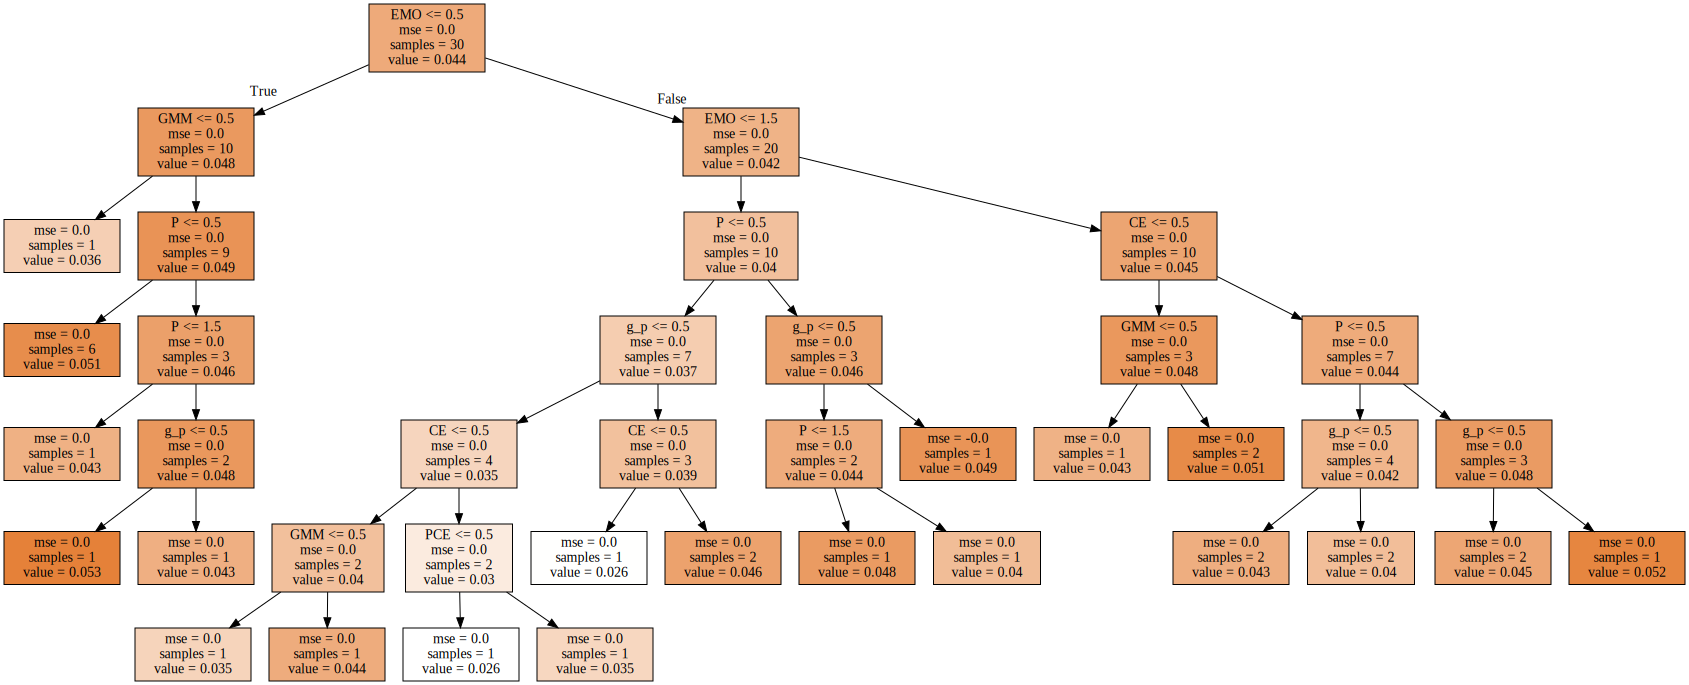

In [7]:
# 参考: https://qiita.com/y-vectorfield/items/4315338d11d4ba8efb0d
# 参考: https://qiita.com/y_itoh/items/52064b6240fa9979b34e#-%E5%9B%9E%E5%B8%B0%E6%9C%A8%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E6%A7%8B%E7%AF%89
import sklearn
from sklearn.tree import DecisionTreeRegressor # 回帰木モデルを作成するクラス
import graphviz

reg = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes)

model = reg.fit(train_x, train_y)

print("score: ", model.score(train_x, train_y))

graph = graphviz.Source(sklearn.tree.export_graphviz(model, filled=True, feature_names=feats))
graph

In [ ]:
n_features = len(feats)
plt.barh(range(n_features), model.feature_importances_)
plt.yticks(np.arange(n_features), feats)
plt.xlabel("feature importance")
plt.ylabel("feature name")
plt.show()

## 実行(発話ごとのpitchのrangeとmean)

In [4]:
# 感情幅と, pitch分散について計算を行う.
# 感情幅の定義は以下の通り
# max(pitchの最大値 - 全発話のpitch平均値,  abs(pitchの最小値 - 全発話のpitch平均値))
# ただし、pitch平均値はクラス内のものとクラス無視の両方を用いてみる.

# 最終的にplotするdataたち
# emo: [[mean, std], [mean, std], ...]
emotion_pitch_mean = {k: [] for k in emotion_names}
emotion_pitch_range = {k: [] for k in emotion_names}

name2emo = {}

# まずは, pitchを計算していく.
for base_path in voice_base_pathes:
    pitch_range = {k: [] for k in emotion_names}
    pitch_mean = {k: [] for k in emotion_names}

    with ProcessPoolExecutor(10) as executor:
        futures = [
            executor.submit(
                get_pitch_emo,
                wav_path,
            )
            for wav_path in Path(base_path).glob("*.wav")
        ]
    for future in tqdm(futures):
        pitch, emo, wav_name = future.result()

        if base_path == emotion_base_path:
            name2emo[wav_name] = emo
        else:
            emo = name2emo[wav_name]

        pitch_mean[emo].append(np.mean(pitch))
        pitch_range[emo].append(np.percentile(pitch, 95) - np.percentile(pitch, 5))

    # クラス内のpitch平均値を計算
    for emo in emotion_names:
        # emotion_pitch_mean[emo].append([ np.mean(pitch_mean[emo]), np.std(pitch_mean[emo]) ])
        # emotion_pitch_range[emo].append([ np.mean(pitch_range[emo]), np.std(pitch_range[emo]) ])
        emotion_pitch_mean[emo].append(pitch_mean[emo])
        emotion_pitch_range[emo].append(pitch_range[emo])

for emo in emotion_names:
    emotion_pitch_mean[emo] = np.array(emotion_pitch_mean[emo])
    emotion_pitch_range[emo] = np.array(emotion_pitch_range[emo])

100%|██████████| 211/211 [00:00<00:00, 7351.15it/s]


In [ ]:
# 計算
stats_name = ["pitch_mean", "pitch_range"]
stats_data = {k: {k_: [] for k_ in stats_name} for k in emotion_names}
stats_data_error = {k: {k_: [] for k_ in stats_name} for k in emotion_names}
# ylims = [[0, 0] for _ in range(len(stats_name))]

def get_max_value(x):
    x = x[:, 0] + (x[:, 1] * 1.25)
    return np.max(x)

for emo in emotion_names:
    for key in stats_name:
        if key == "pitch_mean":
            stats_data[emo][key] = emotion_pitch_mean[emo][:, 0]
            stats_data_error[emo][key] = emotion_pitch_mean[emo][:, 1]
            # ylims[0][1] = max(ylims[0][1], get_max_value(emotion_pitch_mean[emo]))
        elif key == "pitch_range":
            stats_data[emo][key] = emotion_pitch_range[emo][:, 0]
            stats_data_error[emo][key] = emotion_pitch_range[emo][:, 1]
            # ylims[1][1] = max(ylims[1][1], get_max_value(emotion_pitch_range[emo]))

# 図示
fig, axes = plt.subplots(len(emotion_names), len(stats_name), figsize=(15, 15))

axes = axes.flatten()

for i, emo in enumerate(emotion_names):
    for j, key in enumerate(stats_name):
        axes[i+j*len(emotion_names)].set_title(f"{emo}: {key}")
        axes[i+j*len(emotion_names)].bar(
            np.arange(1, 1+len(labels)), stats_data[emo][key], yerr=stats_data_error[emo][key],
            align='center', alpha=0.5, ecolor='black', capsize=10
        )
        axes[i+j*len(emotion_names)].set_xticks(np.arange(1, 1+len(labels)))
        # axes[i+j*len(emotion_names)].set_ylim(ylims[j])
        axes[i+j*len(emotion_names)].grid()
plt.tight_layout()
plt.show()

for i, label in enumerate(labels):
    print(f"ID: {i+1}, label: {label}")

### 決定木を用いた手法の重要度計算

メモ  
binの全探索(1つ飛ばしだけど), Wasserの下での結果:  all 1でscore=1  
自明な結果が一番良かった. binを増やすほど悪化の傾向  
→ 適切なbinは? → スタージェスの公式: 1+log2(n)がいいらしい.

In [6]:
# 条件設定
GT_idx = 0  # labelに対して.
feats = ["GMM", "CE", "PCE", "P"]
# feats = ["EMO", "g_p", "GMM", "CE", "PCE", "P"]
target_data_dict = emotion_pitch_range
# 感情ごとの発話数が異なるのでbinも変えるべき
# Normal: 19, Happy: 65, Sad: 71, Angry: 56
kld_hist_bin_dict = {"Normal": int(1+np.log2(19)), "Happy": int(1+np.log2(65)), "Sad": int(1+np.log2(71)), "Angry": int(1+np.log2(56))}
distance = "Wasser"  # ["KLD", "Wasser"]
# kld_filter = [1.0]
# kld_filter = [0.025, 0.075, 0.8, 0.075, 0.025]
max_leaf_nodes = 20

## 準備
kld_hist_range_dict = {
    emo: (np.percentile(target_data_dict[emo][GT_idx], 5), np.percentile(target_data_dict[emo][GT_idx], 95))
    for emo in target_data_dict.keys()
}
idx2label = {idx - (idx > GT_idx): labels[idx] for idx in range(len(labels))}

#### 入力データ準備

In [7]:
# 手法ありなしのone-hot vector
## GTはall zero
train_x = np.zeros((len(labels) - 1, len(feats)))

feat2ind = {feat: idx for feat, idx in zip(feats, range(len(feats)))}

for idx, label in enumerate(labels):
    label_lst = label.split("+")
    
    if idx == GT_idx:
        continue
    
    for lb in label_lst:
        value = 1
        if "EMO" in lb:
            value = int(lb[-1])
            lb = "EMO"
        elif "P1" == lb or "P2" == lb:
            value = int(lb[-1])
            lb = "P"

        if lb in feats:
            train_x[idx - (idx > GT_idx), feat2ind[lb]] = value

#### 出力データ準備

In [8]:
# 出力は、GTの分布との距離の値.
train_y = np.zeros((len(labels) - 1, len(target_data_dict.keys())))

for emo_idx, emo in enumerate(target_data_dict.keys()):
    for idx, data in enumerate(target_data_dict[emo]):
        if idx == GT_idx:
            continue
        
        if distance == "Wasser":
            train_y[idx - (idx > GT_idx)][emo_idx] = Wasserstein(
                target_data_dict[emo][GT_idx], target_data_dict[emo][idx],
                bins=kld_hist_bin_dict[emo], range=kld_hist_range_dict[emo], debug=False
            )
        elif distance == "KLD":
            train_y[idx - (idx > GT_idx)][emo_idx] = KLD(
                target_data_dict[emo][GT_idx], target_data_dict[emo][idx],
                bins=kld_hist_bin_dict[emo], filter=kld_filter, range=kld_hist_range_dict[emo]
            )
        else:
            raise ValueError()

        # print(emo, ": ", idx2label[idx - (idx > GT_idx)], ": ", train_y[idx - (idx > GT_idx)][emo_idx])

train_y = np.mean(train_y, axis=-1)

sorted_idx = np.argsort(train_y)
for idx in sorted_idx:
    print(idx2label[idx], ": ", train_y[idx])

FS :  0.04537220308844862
FS+GMM+CE :  0.05337052898962788
FS+GMM :  0.05369786670649121
FS+GMM+CE+PCE+P2 :  0.05445456241131921
FS+GMM+CE+PCE+P1 :  0.05512956697830647
FS+GMM+CE+PCE :  0.059997431025071865


#### 決定木訓練&結果

score:  1.0


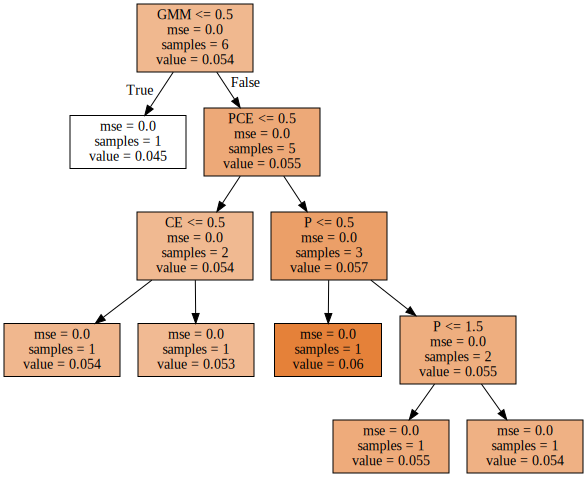

In [9]:
# 参考: https://qiita.com/y-vectorfield/items/4315338d11d4ba8efb0d
# 参考: https://qiita.com/y_itoh/items/52064b6240fa9979b34e#-%E5%9B%9E%E5%B8%B0%E6%9C%A8%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E6%A7%8B%E7%AF%89
import sklearn
from sklearn.tree import DecisionTreeRegressor # 回帰木モデルを作成するクラス
import graphviz

reg = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes)

model = reg.fit(train_x, train_y)

print("score: ", model.score(train_x, train_y))

graph = graphviz.Source(sklearn.tree.export_graphviz(model, filled=True, feature_names=feats))
graph

## 実行(発話ごとのpitch, energyのrangeとmean)

In [ ]:
# 感情幅と, pitch分散について計算を行う.
# 感情幅の定義は以下の通り
# max(pitchの最大値 - 全発話のpitch平均値,  abs(pitchの最小値 - 全発話のpitch平均値))
# ただし、pitch平均値はクラス内のものとクラス無視の両方を用いてみる.

# 最終的にplotするdataたち
# emo: [[mean, std], [mean, std], ...]
emotion_pitch_mean = {k: [] for k in emotion_names}
emotion_pitch_range = {k: [] for k in emotion_names}
emotion_energy_mean = {k: [] for k in emotion_names}
emotion_energy_range = {k: [] for k in emotion_names}

name2emo = {}

# まずは, pitchを計算していく.
for base_path in voice_base_pathes:
    pitch_range = {k: [] for k in emotion_names}
    pitch_mean = {k: [] for k in emotion_names}
    energy_range = {k: [] for k in emotion_names}
    energy_mean = {k: [] for k in emotion_names}

    with ProcessPoolExecutor(10) as executor:
        futures = [
            executor.submit(
                get_pitch_energy_emo,
                wav_path,
            )
            for wav_path in Path(base_path).glob("*.wav")
        ]
    for future in tqdm(futures):
        pitch, energy, emo, wav_name = future.result()

        if base_path == emotion_base_path:
            name2emo[wav_name] = emo
        else:
            emo = name2emo[wav_name]

        pitch_mean[emo].append(np.mean(pitch))
        energy_mean[emo].append(np.mean(energy))
        pitch_range[emo].append(np.percentile(pitch, 95) - np.percentile(pitch, 5))
        energy_range[emo].append(np.percentile(energy, 95) - np.percentile(energy, 5))

    # クラス内のpitch平均値を計算
    for emo in emotion_names:
        emotion_pitch_mean[emo].append([ np.mean(pitch_mean[emo]), np.std(pitch_mean[emo]) ])
        emotion_energy_mean[emo].append([ np.mean(energy_mean[emo]), np.std(energy_mean[emo]) ])
        emotion_pitch_range[emo].append([ np.mean(pitch_range[emo]), np.std(pitch_range[emo]) ])
        emotion_energy_range[emo].append([ np.mean(energy_range[emo]), np.std(energy_range[emo]) ])

for emo in emotion_names:
    emotion_pitch_mean[emo] = np.array(emotion_pitch_mean[emo])
    emotion_pitch_range[emo] = np.array(emotion_pitch_range[emo])
    emotion_energy_mean[emo] = np.array(emotion_energy_mean[emo])
    emotion_energy_range[emo] = np.array(emotion_energy_range[emo])

In [ ]:
# 計算
stats_name = ["pitch_mean", "pitch_range", "energy_mean", "energy_range"]
stats_data = {k: {k_: [] for k_ in stats_name} for k in emotion_names}
stats_data_error = {k: {k_: [] for k_ in stats_name} for k in emotion_names}
ylims = [[0, 0] for _ in range(len(stats_name))]

def get_max_value(x):
    x = x[:, 0] + (x[:, 1] * 1.25)
    return np.max(x)

for emo in emotion_names:
    for key in stats_name:
        if key == "pitch_mean":
            stats_data[emo][key] = emotion_pitch_mean[emo][:, 0]
            stats_data_error[emo][key] = emotion_pitch_mean[emo][:, 1]
            ylims[0][1] = max(ylims[0][1], get_max_value(emotion_pitch_mean[emo]))
        elif key == "pitch_range":
            stats_data[emo][key] = emotion_pitch_range[emo][:, 0]
            stats_data_error[emo][key] = emotion_pitch_range[emo][:, 1]
            ylims[1][1] = max(ylims[1][1], get_max_value(emotion_pitch_range[emo]))
        elif key == "energy_mean":
            stats_data[emo][key] = emotion_energy_mean[emo][:, 0]
            stats_data_error[emo][key] = emotion_energy_mean[emo][:, 1]
            ylims[2][1] = max(ylims[2][1], get_max_value(emotion_energy_mean[emo]))
        elif key == "energy_range":
            stats_data[emo][key] = emotion_energy_range[emo][:, 0]
            stats_data_error[emo][key] = emotion_energy_range[emo][:, 1]
            ylims[3][1] = max(ylims[3][1], get_max_value(emotion_energy_range[emo]))

# 図示
fig, axes = plt.subplots(len(emotion_names), len(stats_name), figsize=(15, 15))

axes = axes.flatten()

for i, emo in enumerate(emotion_names):
    for j, key in enumerate(stats_name):
        axes[i+j*len(emotion_names)].set_title(f"{emo}: {key}")
        axes[i+j*len(emotion_names)].bar(
            np.arange(1, 1+len(labels)), stats_data[emo][key], yerr=stats_data_error[emo][key],
            align='center', alpha=0.5, ecolor='black', capsize=10
        )
        axes[i+j*len(emotion_names)].set_xticks(np.arange(1, 1+len(labels)))
        axes[i+j*len(emotion_names)].set_ylim(ylims[j])
        axes[i+j*len(emotion_names)].grid()
plt.tight_layout()
plt.show()

for i, label in enumerate(labels):
    print(f"ID: {i}, label: {label}")

## 実行(発話ごとの統計量)

In [ ]:
# 感情幅と, pitch分散について計算を行う.
# 感情幅の定義は以下の通り
# max(pitchの最大値 - 全発話のpitch平均値,  abs(pitchの最小値 - 全発話のpitch平均値))
# ただし、pitch平均値はクラス内のものとクラス無視の両方を用いてみる.

# 最終的にplotするdataたち
emotion_widthes_w_all_mean = []
emotion_widthes_w_class_mean = []
emotion_variances = []
emotion_skewnesses = []
emotion_kurtosises = []

name2emo = {}

# まずは, pitchを計算していく.
for base_path in voice_base_pathes:
    pitch_max = {k: [] for k in emotion_names}
    pitch_min = {k: [] for k in emotion_names}
    pitch_for_mean = {k: [] for k in emotion_names}
    pitch_variance = []
    pitch_kurtosis = []
    pitch_skewness = []
    with ProcessPoolExecutor(10) as executor:
        futures = [
            executor.submit(
                get_pitch_emo,
                wav_path,
            )
            for wav_path in Path(base_path).glob("*.wav")
        ]
    for future in tqdm(futures):
        pitch, emo, wav_name = future.result()
        
        if base_path == emotion_base_path:
            name2emo[wav_name] = emo
        else:
            emo = name2emo[wav_name]

        pitch_max[emo].append(np.max(pitch))
        pitch_min[emo].append(np.min(pitch))
        pitch_variance.append(np.std(pitch))
        pitch_kurtosis.append(stats.kurtosis(pitch))
        pitch_skewness.append(stats.skew(pitch))
        
        pitch_for_mean[emo] += list(pitch)

    emotion_variances.append(pitch_variance)
    emotion_kurtosises.append(pitch_kurtosis)
    emotion_skewnesses.append(pitch_skewness)
    
    # クラス内、外のpitch平均値を計算
    class_mean = {}
    all_mean = []
    for k, v in pitch_for_mean.items():
        class_mean[k] = np.mean(v)
        all_mean += v
    all_mean = np.mean(all_mean)
    
    # 平均値を用いて, 最終的なpitch幅を計算
    emotion_width_w_all_mean = []
    emotion_width_w_class_mean = []
    for k in emotion_names:
        pitches_max = np.array(pitch_max[k])
        pitches_min = np.array(pitch_min[k])
        
        pitches_w_all_mean = np.maximum(
            pitches_max - all_mean,
            np.abs(pitches_min - all_mean)
        )
        pitches_w_class_mean = np.maximum(
            pitches_max - class_mean[k],
            np.abs(pitches_min - class_mean[k])
        )
        emotion_width_w_all_mean += list(pitches_w_all_mean)
        emotion_width_w_class_mean += list(pitches_w_class_mean)
    
    emotion_widthes_w_all_mean.append(emotion_width_w_all_mean)
    emotion_widthes_w_class_mean.append(emotion_width_w_class_mean)

    print(base_path)
    print("クラス毎のpitch平均: ", class_mean)
    print()

In [ ]:
# box plot
fig, axes = plt.subplots(5, 1, figsize=(35, 60))

axes = axes.flatten()

titles = ["pitch width inter classes", "pitch width intra classes", "pitch std", "pitch skewness", "pitch kurtosis"]
for i, datas in enumerate([emotion_widthes_w_all_mean, emotion_widthes_w_class_mean, emotion_variances, emotion_skewnesses, emotion_kurtosises]):
    axes[i].set_title(titles[i])
    axes[i].set_xticklabels(labels)
    axes[i].boxplot(datas, sym="")
    axes[i].grid()
plt.tight_layout()
plt.show()

## 実行(発話全体の統計量)

In [ ]:
# 感情幅と, pitch分散について計算を行う.
# 感情幅の定義は以下の通り
# max(pitchの最大値 - 全発話のpitch平均値,  abs(pitchの最小値 - 全発話のpitch平均値))
# ただし、pitch平均値はクラス内のものとクラス無視の両方を用いてみる.

# 最終的にplotするdataたち
# 感情毎
all_data_pitches = {k: [] for k in emotion_names}
name2emo = {}

# まずは, pitchを計算していく.
for base_path in voice_base_pathes:
    tmp_pitches = {k: [] for k in emotion_names}
    
    with ProcessPoolExecutor(10) as executor:
        futures = [
            executor.submit(
                get_pitch_emo,
                wav_path,
            )
            for wav_path in Path(base_path).glob("*.wav")
        ]
    for future in tqdm(futures):
        pitch, emo, wav_name = future.result()
        
        if base_path == emotion_base_path:
            name2emo[wav_name] = emo
        else:
            emo = name2emo[wav_name]
        tmp_pitches[emo] += list(pitch)

    for key in emotion_names:
        all_data_pitches[key].append(tmp_pitches[key])

In [ ]:
# 各種統計量

# 計算
stats_name = ["mean", "std", "skew", "kurt"]
stats_data = {k: {k_: [] for k_ in stats_name} for k in emotion_names}
ylims = [[0, 0] for _ in range(len(stats_name))]

for emo in emotion_names:
    for data_ in all_data_pitches[emo]:
        for key in stats_name:
            if key == "mean":
                stats_data[emo][key].append(np.mean(data_))
                ylims[0][1] = max(ylims[0][1], np.mean(data_)*1.05)
            elif key == "std":
                stats_data[emo][key].append(np.std(data_))
                ylims[1][1] = max(ylims[1][1], np.std(data_)*1.05)
            elif key == "skew":
                stats_data[emo][key].append(stats.skew(data_))
                ylims[2][0] = min(ylims[2][0], stats.skew(data_)*1.05)
                ylims[2][1] = max(ylims[2][1], stats.skew(data_)*1.05)
            elif key == "kurt":
                stats_data[emo][key].append(stats.kurtosis(data_))
                ylims[3][0] = min(ylims[3][0], stats.kurtosis(data_)*1.05)
                ylims[3][1] = max(ylims[3][1], stats.kurtosis(data_)*1.05)

# 図示
fig, axes = plt.subplots(len(emotion_names), len(stats_name), figsize=(15, 15))

axes = axes.flatten()

for i, emo in enumerate(emotion_names):
    for j, key in enumerate(stats_name):
        axes[i+j*len(emotion_names)].set_title(f"{emo}: {key}")
        axes[i+j*len(emotion_names)].bar(np.arange(1, 1+len(labels)), stats_data[emo][key])
        axes[i+j*len(emotion_names)].set_xticks(np.arange(1, 1+len(labels)))
        axes[i+j*len(emotion_names)].set_ylim(ylims[j])
        axes[i+j*len(emotion_names)].grid()
plt.tight_layout()
plt.show()

for i, label in enumerate(labels):
    print(f"ID: {i}, label: {label}")

In [ ]:
# hist plot(感情毎)
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

axes = axes.flatten()

for i, emo in enumerate(emotion_names):
    axes[i].set_title(emo)
    axes[i].hist(all_data_pitches[emo], bins=100, label=labels)
    axes[i].legend()
plt.tight_layout()
plt.show()

# MOSのt検定

In [59]:
import re
import numpy as np
from scipy import stats
from itertools import combinations

## データの用意

In [60]:
text_data = """
Total:
listeners: 100
METHOD MEAN CONF(95%)
20211214_FS2 3.310000 0.103873 (1:20,2:69,3:129,4:131,5:51,total: 400)
20211214_FS2+GMM 3.112500 0.104150 (1:24,2:98,3:121,4:123,5:34,total: 400)
20211214_FS2+GMM+CE 3.272500 0.097094 (1:14,2:75,3:137,4:136,5:38,total: 400)
20211214_FS2+GMM+CE+PCE 3.190000 0.097376 (1:19,2:74,3:153,4:120,5:34,total: 400)
20211214_FS2+GMM+CE+PCE+P1 3.282500 0.104050 (1:14,2:87,3:125,4:120,5:54,total: 400)
20211214_FS2+GMM+CE+PCE+P2 3.160000 0.103195 (1:24,2:86,3:127,4:128,5:35,total: 400)
Reconstructed 4.130000 0.087649 (1:3,2:16,3:70,4:148,5:163,total: 400)
"""

In [61]:
label_names = [line.split(" ")[0] for line in text_data.strip().split("\n")[3:]]
id2label = {i:label for i, label in enumerate(label_names)}
label2id = {v:k for k, v in id2label.items()}

eval_data_txts = [re.findall(r'\((.+?)\)', text_data.strip().split("\n")[3+i])[0] for i in range(len(label_names))]

eval_data = []
for eval_data_txt in eval_data_txts:
    mos_data = []
    for x in eval_data_txt.split(",")[:-1]:
        num, cnt = x.split(":")
        mos_data += [int(num)] * int(cnt)
    eval_data.append(mos_data)

eval_data = np.array(eval_data)

### 検定実行

In [62]:
# 比較したい2つのidを選ぶ
print(label2id)

tgt_1 = 0
tgt_2 = 3

# 検定
_, p = stats.ttest_ind(eval_data[tgt_1], eval_data[tgt_2], equal_var=False)

print("# 結果")
print("比較対象:")
print(f"  {id2label[tgt_1]}")
print(f"  {id2label[tgt_2]}")
print("p値: ", p)
print("有意差あり: ", p < 0.05)

{'20211214_FS2': 0, '20211214_FS2+GMM': 1, '20211214_FS2+GMM+CE': 2, '20211214_FS2+GMM+CE+PCE': 3, '20211214_FS2+GMM+CE+PCE+P1': 4, '20211214_FS2+GMM+CE+PCE+P2': 5, 'Reconstructed': 6}
# 結果
比較対象:
  20211214_FS2
  20211214_FS2+GMM+CE+PCE
p値:  0.09792859499534651
有意差あり:  False


In [63]:
# 全通りの検定

results = []

for tgt_1, tgt_2 in combinations([0, 1, 2, 3, 4, 5], 2):
    _, p = stats.ttest_ind(eval_data[tgt_1], eval_data[tgt_2], equal_var=False)
    
    if p < 0.05:
        results.append([tgt_1, tgt_2])


print("# 結果")
print("有意差があった組み合わせ")
for tgt_1, tgt_2 in results:
    print(f"{id2label[tgt_1]}, {id2label[tgt_2]}")

# 結果
有意差があった組み合わせ
20211214_FS2, 20211214_FS2+GMM
20211214_FS2, 20211214_FS2+GMM+CE+PCE+P2
20211214_FS2+GMM, 20211214_FS2+GMM+CE
20211214_FS2+GMM, 20211214_FS2+GMM+CE+PCE+P1
